# Praktikum Visi Komputer
## Modul ke-2

## Setting up library, OpenCV, Handling file

Python memiliki banyak library yang dapat digunakan untuk berbagai keperluan. Untuk keperluan mata kuliah visi komputer ini kita memerlukan library numpy, scipy, dan opencv. 
- NumPy merupakan library pada bahasa Python yang menyediakan fitur operasi pada multi-dimensional array dan matriks, juga segala macam fungsi matematika yang dapat digunakan pada array tersebut. Untuk menginstallnya dapat menggunakan `pip install numpy`
- SciPy merupakan library yang berguna untuk scientific computing dan technical computing. SciPy mengandung modul untuk optimisasi, aljabar linear, interpolasi, signal dan image processing, dan lain sebagainya. Untuk menginstallnya dapat menggunakan `pip install scipy`
- OpenCV merupakan library yang bertujuan untuk real-time computer vision. Untuk menginstallnya dapat menggunakan `pip install opencv-python` atau `pip install opencv-contrib-python`

Biasanya kalau menggunakan Anaconda, numpy dan scipy sudah terinstall. Namun untuk OpenCV perlu install menggunakan pip.
Apabila anda sudah berhasil install library di atas, coba import berikut.

In [2]:
#coba import library, jika tidak ada error berarti library sudah terinstall
import numpy
import scipy
import cv2

### Handling Files

Aplikasi visi komputer (CV) biasanya memerlukan gambar sebagai input dan menghasilkan gambar juga sebagai output. Namun ada juga yang memerlukan kamera sebagai input dan window sebagai outputnya. Jadi input dapat berupa gambar, video dan raw byte.

OpenCV menyediakan fungsi `imread` untuk membaca gambar dari file dan fungsi `imwrite` untuk menulis gambar ke file. Fungsi-fungsi ini bekerja pada gambar bukan video. Format yang didukung seperti BMP, PNG, JPEG, dan TIFF.

Suatu gambar direpresentasikan dalam bentuk array multi-dimensi, yang memiliki pixel untuk kolom dan baris serta setiap piksel memiliki nilai. Nilai piksel jelas berbeda-beda untuk setiap gambar. Berikut contoh 3x3 piksel berwarna hitam dengan menggunakan 2D NumPy array:

In [2]:
img = numpy.zeros((3, 3), dtype=numpy.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

Contoh 3x3 piksel di atas direpresentasikan sebagai integer 8-bit, maknanya bernilai dari rentang 0-255. 0 maknanya hitam, dan 255 maknanya putih, serta nilai di antaranya berupa gray. Jadi gambar ini adalah gambar grayscale.

Kita coba konversi gambar tersebut menjadi format blue-green-red (BGR) menggunakan fungsi `cv2.cvtColor`.

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Di sini dapat dilihat setiap piksel diwakilkan dalama array dengan 3-element, di mana setiap integer merepresentasikan satu dari tiga channel warna: B, G, R. Selain itu, gambar berwarna juga dapat direpresentasikan dalam format HSV (Hue Saturation Value).

Kita dapat mengecek struktur dari gambar dengan menggunakan property `shape` yang akan mengembalikan baris, kolom dan jumlah channel (apabila ada).

In [4]:
img = numpy.zeros((5, 3), dtype=numpy.uint8)
print(img.shape)

#apabila diubah jadi gambar berwarna
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img.shape)

(5, 3)
(5, 3, 3)


Berikut ini kita akan membaca file gambar seperti di bawah. Download file tersebut dan simpan pada folder tempat anda menyimpan notebook ini.

<img src="https://i.im.ge/2021/09/02/Q1Y9SM.jpg" alt="CVS" width="200"/>

In [13]:
#Contoh 1: membuka gambar dari file
img = cv2.imread("gambar/gambar1.jpg", cv2.IMREAD_COLOR)
cv2.imshow("Computer Vision Syndrome", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
#Latihan 1
#ubah code Contoh 1 dengan menampilkan gambar foto anda sendiri
image = cv2.imread("gambar/Nailul.jpg", cv2.IMREAD_COLOR)
cv2.imshow("Nailul", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Berikutnya kita coba tampilkan struktur dari gambar di atas dengan `shape`.

In [14]:
# Tipe gambar. Di sini dapat dilihat bahwa gambar direpresentasikan dalam array multi-dimensi numpy
print(type(img))
# <class 'numpy.ndarray'>

print(img.shape)
print(type(img.shape))
h, w, c = img.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

<class 'numpy.ndarray'>
(396, 480, 3)
<class 'tuple'>
height:  396
width:   480
channel: 3


Kemudian kita coba ubah menjadi gambar grayscale.

In [38]:
img_gray = cv2.imread("gambar/gambar1.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Computer Vision Syndrome in grayish", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
#Kita dapat mengubah gambar bewarna menjadi gray secara langsung
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Computer Vision Syndrome in grayish", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Berikutnya kita coba tampilkan struktur dari gambar di atas dengan `shape` dan bandingkan hasilnya dengan gambar berwarna.

In [20]:
# Tipe gambar. Di sini dapat dilihat bahwa gambar direpresentasikan dalam array multi-dimensi numpy
print(type(img))
# <class 'numpy.ndarray'>

print(img.shape)
print(type(img.shape))
h, w = img_gray.shape
print('height: ', h)
print('width:  ', w)

<class 'numpy.ndarray'>
(396, 480, 3)
<class 'tuple'>
height:  396
width:   480


Kita dapat menyimpan gambar ke dalam file yang lain.

In [21]:
cv2.imwrite('gambar/gambar1_gray.jpg', img_gray)

True

Sesudah code di atas dijalankan, cek folder tempat anda menyimpan gambar. Maka sudah muncul tambahan gambar grayscale dari gambar asli tadi.

Kita juga dapat mengubah format gambar.

In [24]:
img = cv2.imread('gambar/gambar1.jpg')
cv2.imwrite('gambar/gambar1.png', img)

True

Cek kembali folder tempat anda menyimpan gambar. Sekarang ada tambahan gambar yang sama dengan format PNG.

Fungsi `imread` memiliki beberapa pilihan property seperti:
- cv2.IMREAD_COLOR: pilihan default untuk BGR 3-channel dengan setiap piksel bernilai 8-bit (0-255) untuk setiap channel.
- cv2.IMREAD_GRAYSCALE: 8-bit gambar grayscale.
- cv2.IMREAD_ANYCOLOR: 8-bit-per-channel gambar atau 8-bit gambar grayscale, tergantung file metadata.
- cv2.IMREAD_UNCHANGED: membaca semua data image termasuk channel alpha transparency channel (jika ada) sebagai channel ke-4.
- cv2.IMREAD_ANYDEPTH
- cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR
- cv2.IMREAD_REDUCED_GRAYSCALE_2: resolusi jadi setengahnya. 
- cv2.IMREAD_REDUCED_COLOR_2: resolusi jadi setengahnya.
- cv2.IMREAD_REDUCED_GRAYSCALE_4: resolusi jadi seperempatnya.
- cv2.IMREAD_REDUCED_COLOR_4: resolusi jadi seperempatnya.
- cv2.IMREAD_REDUCED_GRAYSCALE_8: resolusi jadi seperdelapannya.
- cv2.IMREAD_REDUCED_COLOR_8: resolusi jadi seperdelapannya.

### Konversi antara gambar dan raw bytes

Secara konsep, satu byte adalah integer dalam rentang 0-255. Biasanya satu piksel diwakilkan sebagai satu byte per channel. 
Image pada OpenCV berupa array 2D atau 3D bertipe numpy.array. Image 8-bit grayscale berupa array 2D yang mengandung nilai bytenya. Image 24-bit BGR berupa array 3D yang mengandung nilai bytenya. 

Kita dapat mengakses nilai byte dengan ekspresi seperti image[0, 0] atau image[0, 0, 0]. Index pertama adalah koordinat y atau baris, dengan nilai 0 bermakna yang paling atas. Index kedua adalah koordinat x atau kolom, dengan nilai 0 bermakna yang paling kiri. Sedangkan index ketiga (pada 3D) merepresentasikan channel warna. 

Array 3D dapat divisualisasikan pada sistem koordinat seperti gambar berikut.

<img src="https://i.im.ge/2021/09/02/Q1bO8C.png" alt="Sistem koordinat" style="width:200px;"/>


In [25]:
import cv2
import numpy
import os

# Make an array of 120,000 random bytes.
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = numpy.array(randomByteArray)

# Convert the array to make a 400x300 grayscale image.
grayImage = flatNumpyArray.reshape(300, 400)
cv2.imwrite('gambar/RandomGray.png', grayImage)

# Convert the array to make a 400x100 color image.
bgrImage = flatNumpyArray.reshape(100, 400, 3)
cv2.imwrite('gambar/RandomColor.png', bgrImage)

True

Contoh di atas melakukan konversi dari bytearray yang mengandung random bytes menjadi image grayscale dan image BGR. Pada contoh tersebut, digunakan fungsi os.urandom untuk menghasilkan random
raw bytes, yang berikutnya diubah jadi NumPy array. Namun sebenarnya ada cara yang lebih efisien membuat NumPy array acak dengan cara `numpy.random.randint(0, 256, 120000).reshape(300, 400)`. Namun di sini os.urandom digunakan untuk mendemonstrasikan proses konversi dari raw bytes.
Setelah code di atas dijalankan, maka kita akan mendapatkan 2 gambar RandomGray.png dan RandomColor.png.

### Membaca data gambar menggunakan numpy.array

Berdasarkan contoh-contoh di atas, cara mudah untuk membaca suatu image di OpenCV dengan menggunakan fungsi `imread` yang akan mengembalikan image dalam bentuk array (2D atau 3D). 

Class numpy.array telah dioptimisasi untuk berbagai macam operasi array yang tidak tersedia pada list Python yang biasa (plain tanpa NumPy). Class numpy.array ini sangat berguna untuk manipulasi image pada OpenCV. Kita akan coba melakukan manipulasi image pada contoh-contoh berikut ini.

Pertama kita mencoba ubah piksel pada koordinat (0, 0) pada gambar BGR dan mengubahnya menjadi piksel berwarna putih.

In [26]:
img = cv2.imread('gambar/gambar1.jpg')
img[0, 0] = [255, 255, 255]
cv2.imwrite('gambar/gambar1-1.jpg', img)

True

Kita juga dapat menggunakan fungsi itemset untuk mengubah piksel pada channel tertentu ke suatu nilai yang baru. Dan fungsi item yang akan mengembalikan nilai piksel pada channel tertentu.
Fungsi item dan itemset memerlukan koordinat x, y dan channel B (0), G (1) atau R (2).

In [27]:
#sebelum diubah
print(img.item(150, 120, 0)) 

#sesudah diubah
img.itemset((150, 120, 0), 255) # Sets the value of a pixel's blue channel
print(img.item(150, 120, 0)) # Prints the value of a pixel's blue channel

56
255


Namun manipulasi per piksel seperti di atas menjadi tidak efisien apabila data yang ingin dimanipulasi adalah bagian yang besar atau keseluruhan dari gambar. Pada kasus ini, kita sebaiknya memanfaatkan fungsi-fungsi pada OpenCV atau array slicing pada NumPy. 

Contoh berikut ini menggunakan array slicing untuk memanipulasi channel warna. Di sini kita mengubah nilai G (hijau) pada suatu gambar menjadi 0. 

In [28]:
#Contoh 2
img = cv2.imread('gambar/gambar1.jpg')
#sebelum berubah
print(img)

#array slice
img[:, :, 1] = 0
#sesudah berubah
print(img)
cv2.imwrite('gambar/gambar1-2.jpg', img)

[[[ 69  79 227]
  [ 69  79 227]
  [ 70  80 227]
  ...
  [ 71  81 228]
  [ 70  80 228]
  [ 69  79 227]]

 [[ 69  79 227]
  [ 69  79 227]
  [ 70  80 227]
  ...
  [ 70  80 227]
  [ 70  80 228]
  [ 70  80 228]]

 [[ 71  81 229]
  [ 70  80 228]
  [ 70  80 227]
  ...
  [ 69  79 226]
  [ 69  79 227]
  [ 70  80 228]]

 ...

 [[182 211 172]
  [171 200 161]
  [169 198 159]
  ...
  [170 199 160]
  [170 199 160]
  [170 199 160]]

 [[182 211 172]
  [171 200 161]
  [169 198 159]
  ...
  [170 199 160]
  [170 199 160]
  [170 199 160]]

 [[182 211 172]
  [171 200 161]
  [169 198 159]
  ...
  [170 199 160]
  [170 199 160]
  [170 199 160]]]
[[[ 69   0 227]
  [ 69   0 227]
  [ 70   0 227]
  ...
  [ 71   0 228]
  [ 70   0 228]
  [ 69   0 227]]

 [[ 69   0 227]
  [ 69   0 227]
  [ 70   0 227]
  ...
  [ 70   0 227]
  [ 70   0 228]
  [ 70   0 228]]

 [[ 71   0 229]
  [ 70   0 228]
  [ 70   0 227]
  ...
  [ 69   0 226]
  [ 69   0 227]
  [ 70   0 228]]

 ...

 [[182   0 172]
  [171   0 161]
  [169   0 159]
  ..

True

In [43]:
#Latihan 2
#ubah code Contoh 2 dengan menampilkan gambar anda sendiri lalu ubah nilai B menjadi 0
#jawaban disimpan pada file gambar yang berbeda lalu tampilkan
img = cv2.imread("gambar/Nailul.jpg")

#sebelum berubah
print(img)

#Array Slice
img[:, :, 0] = 0

#Sesudah berubah
print(img)
cv2.imwrite('gambar/Nailul-B0.jpg', img)

#ubah code Contoh 2 dengan menampilkan gambar anda sendiri lalu ubah nilai G menjadi 0
#jawaban disimpan pada file gambar yang berbeda lalu tampilkan
image = cv2.imread('gambar/Nailul.jpg')

#sebelum berubah
print(image)

#Array Slice
image[:, :, 1] = 0

#sesudah berubah
print(image)
cv2.imwrite("gambar/Nailul-G0.jpg", image)

#ubah code Contoh 2 dengan menampilkan gambar anda sendiri lalu ubah nilai R menjadi 0
#jawaban disimpan pada file gambar yang berbeda lalu tampilkan
#sebelum berubah
gambar = cv2.imread('gambar/Nailul.jpg')
print(gambar)

#Array slice
gambar[:, :, 2] = 0

#sesudah berubah
print(gambar)
cv2.imwrite('gambar/Nailul-R0.jpg', gambar)




[[[191 204 206]
  [191 204 206]
  [191 204 206]
  ...
  [125 105  57]
  [142 122  74]
  [166 146  99]]

 [[191 204 206]
  [191 204 206]
  [191 204 206]
  ...
  [100  81  30]
  [112  93  42]
  [140 120  72]]

 [[192 205 207]
  [192 205 207]
  [191 204 206]
  ...
  [ 86  70  17]
  [ 96  80  27]
  [ 96  79  28]]

 ...

 [[203 219 218]
  [202 218 217]
  [201 217 216]
  ...
  [150 195 216]
  [152 197 218]
  [154 202 220]]

 [[203 219 218]
  [203 219 218]
  [202 218 217]
  ...
  [145 192 213]
  [151 198 219]
  [141 189 207]]

 [[203 219 218]
  [203 219 218]
  [202 218 217]
  ...
  [140 187 208]
  [144 191 212]
  [132 180 198]]]
[[[  0 204 206]
  [  0 204 206]
  [  0 204 206]
  ...
  [  0 105  57]
  [  0 122  74]
  [  0 146  99]]

 [[  0 204 206]
  [  0 204 206]
  [  0 204 206]
  ...
  [  0  81  30]
  [  0  93  42]
  [  0 120  72]]

 [[  0 205 207]
  [  0 205 207]
  [  0 204 206]
  ...
  [  0  70  17]
  [  0  80  27]
  [  0  79  28]]

 ...

 [[  0 219 218]
  [  0 218 217]
  [  0 217 216]
  ..

True

Pada contoh 2, gambar diubah secara keseluruhan. Namun kita juga dapat mendefinisikan regions of interests (ROI). Sesudah ROI dibuat, kita dapat melakukan berbagai operasi seperti menyimpan ROI tersebut ke dalam variabel, membuat region baru, dan menyimpan region pertama ke region kedua (dengan kata lain meng-copy sebagian image). Namun pastikan ukurannya sesuai, jika berlebih maka akan error.

In [44]:
img = cv2.imread('gambar/gambar1.jpg')
my_roi = img[0:100, 0:100]
img[100:200, 100:200] = my_roi
cv2.imwrite('gambar/gambar1-3.jpg', img)

True

Kita dapat mendapatkan informasi property dari numpy.array seperti:
- shape: ini berupa tuple yang menjelaskan shape dari array. Untuk image, akan mengandung height, width, banyaknya channel (pada image berwarna). Panjang dari shape berguna untuk menentukan apakah image grayscale atau berwarna. Untuk image grayscale, len(shape) == 2, sedangkan image berwarna, len(shape) == 3. 
- size: ini merupakan jumlah elemen pada array. Pada image grayscale, jumlahnya sama dengan jumlah piksel. Namun pada image BGR, jumlahnya 3 kali lipat dari jumlah piksel sebab setiap piksel direpresentasikan oleh 3 elemen (B, G, R).
- dtype: ini merupakan tipe data dari unsur array. Untuk image 8-bit-per-channel, tipe datanya numpy.uint8.

In [45]:
img = cv2.imread('gambar/gambar1.jpg')
print(img.shape)
print(img.size)
print(img.dtype)

img = cv2.imread('gambar/gambar1_gray.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(img.size)
print(img.dtype)

(396, 480, 3)
570240
uint8
(396, 480)
190080
uint8


### Membaca dan menulis file video 

OpenCV menyediakan class VideoCapture dan VideoWriter yang mendukung berbagai macam format file video. Format yang didukung bergantung pada sistem operasi dan konfigurasi dari OpenCV. Pada objek VideoCapture kita gunakan method read untuk membaca frame hingga akhir dari file video. Setiap frame merupakan image dengan format BGR.

Sebaliknya image yang dikirim ke method write pada class VideoWriter akan meng-append (sambung) image menjadi file video. 

Beberapa pilihan codec yang bisa digunakan:
- 0: uncompressed raw video file dengan ekstensi .avi.
- cv2.VideoWriter_fourcc('I','4','2','0'): uncompressed YUV encoding, 4:2:0 chroma subsampled. Hasilnya file yang besar dengan ekstensi .avi.
- cv2.VideoWriter_fourcc('P','I','M','1'): MPEG-1 dengan ekstensi .avi.
- cv2.VideoWriter_fourcc('X','V','I','D'): MPEG-4 encoding yang lama namun file hasilnya kecil dengan ekstensi .avi.
- cv2.VideoWriter_fourcc('M','P','4','V'): MPEG-4 encoding yang lama dengan ekstensi .mpp.
- cv2.VideoWriter_fourcc('X','2','6','4'): MPEG-4 encoding yang baru dengan ukuran relatif kecil dan ekstensi .mp4.
- cv2.VideoWriter_fourcc('T','H','E','O'): Ogg Vorbis dengan ekstensi .ogv.
- cv2.VideoWriter_fourcc('F','L','V','1'): Flash video dengan ekstensi .flv.

Berikut adalah contoh pembacaan frame pada file MP4 dan menulisnya ke file lain dengan encoding X264 formatnya mp4.


In [47]:
#Membaca file video, kemudian dapatkan fps dan size
videoCapture = cv2.VideoCapture('gambar/traffic-short.mp4')
fps = videoCapture.get(cv2.CAP_PROP_FPS)
size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
    int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

#Buka videowriter utk file output dengan pilihan encoding
videoWriter = cv2.VideoWriter(
    'gambar/traffic-short-out.mp4', cv2.VideoWriter_fourcc('X','2','6','4'), fps, size)

#Mulai membaca dan menulis file video
success, frame = videoCapture.read()
while success: # Loop until there are no more frames.
    videoWriter.write(frame)
    success, frame = videoCapture.read()

In [49]:
#Berikut contoh jika input berasal dari camera. Di sini akan diambil dari camera laptop/komputer
cameraCapture = cv2.VideoCapture(0)
fps = 30 # An assumption
size = (int(cameraCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),

int(cameraCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
videoWriter = cv2.VideoWriter(
    'gambar/MyOutputVid.avi', cv2.VideoWriter_fourcc('I','4','2','0'), fps, size)

success, frame = cameraCapture.read()
numFramesRemaining = 10 * fps - 1 # 10 seconds of frames
while success and numFramesRemaining > 0:
    videoWriter.write(frame)
    success, frame = cameraCapture.read()
    numFramesRemaining -= 1

In [24]:
#Berikut ini code untuk menampilkan tangkapan dari camera laptop/komputer pada suatu window
clicked = False
def onMouse(event, x, y, flags, param):
    global clicked
    if event == cv2.EVENT_LBUTTONUP:
        clicked = True

cameraCapture = cv2.VideoCapture(0)
cv2.namedWindow('MyWindow')
cv2.setMouseCallback('MyWindow', onMouse)

print('Showing camera feed. Click window or press any key to stop.')
success, frame = cameraCapture.read()
while success and cv2.waitKey(1) == -1 and not clicked:
    cv2.imshow('MyWindow', frame)
    success, frame = cameraCapture.read()
cv2.destroyWindow('MyWindow')
cameraCapture.release()

Showing camera feed. Click window or press any key to stop.


### Menampilkan banyak gambar dalam satu tampilan

Selain dari menggunakan window, kita dapat memanfaatkan library matplotlib untuk memudahkan dalam menampilkan gambar.

[![Q2o6yG.th.png](https://i.im.ge/2021/09/02/Q2o6yG.th.png)](https://im.ge/i/Q2o6yG)
[![Q2ot1a.th.png](https://i.im.ge/2021/09/02/Q2ot1a.th.png)](https://im.ge/i/Q2ot1a)
[![Q2oymJ.th.png](https://i.im.ge/2021/09/02/Q2oymJ.th.png)](https://im.ge/i/Q2oymJ)
[![Q2oAZy.th.png](https://i.im.ge/2021/09/02/Q2oAZy.th.png)](https://im.ge/i/Q2oAZy)

Text(0.5, 1.0, 'Fourth')

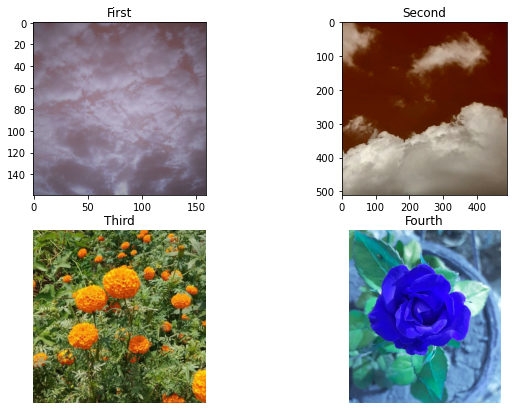

In [53]:
#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('gambar/Image1.png')
Image2 = cv2.imread('gambar/Image2.png')
Image3 = cv2.imread('gambar/Image3.png')
Image4 = cv2.imread('gambar/Image4.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('on')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('on')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")


Video untuk latihan 3 dan 4 : 
https://bit.ly/3zEv9i4

In [20]:
#Latihan 3
#Tampilkan 5 frame pertama dari video di atas, langkahnya:
#buka stream video 
#look 5 kali utk membaca 5 frame pertama dan simpan ke image 
#tampilkan gambar 5 frame tersebut 

#membaca video
video = cv2.VideoCapture('gambar/traffic-short.mp4')

#loop 5 kali
i=0
while(video.isOpened()):
    ret, frame = video.read()
    if (i >= 5):
        break
    cv2.imwrite('gambar/frame_0'+str(i+1)+'.jpg', frame)
    cv2.imshow('frame_0'+str(i+1), cv2.imread('gambar/frame_0'+str(i+1)+'.jpg', cv2.IMREAD_COLOR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    i+=1
    
video.release() 



In [23]:
#Latihan 4
#Ambil 2 frame pertama dari video di atas simpan ke dalam 2 file gambar
#kemudian cari perbedaannya dengan fungsi np.subtract
#file bedanya ditulis ke dalam file yang baru
#tampilkan 2 file gambar dan file gambar perbedaannya

#membaca gambar
img = cv2.imread('gambar/frame_01.jpg')
img2 = cv2.imread('gambar/frame_02.jpg')

#mencari perbedaan dengan fungsi np.subtract
arr = numpy.subtract(img, img2)

#File bedanya ditulis di file lain
cv2.imwrite('gambar/latihan4.jpg', arr)

#looping untuk menampilkan 2 gambar frame video
i=1
while (i<3):
    gambar = cv2.imread("gambar/frame_0" + str(i) + ".jpg", cv2.IMREAD_COLOR)
    cv2.imshow('Gambar ' +str(i), gambar)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    i+=1

#menampilkan gambar yang sudah di subtract
cv2.imshow('Latihan4', cv2.imread('gambar/latihan4.jpg', cv2.IMREAD_COLOR))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [35]:
#Latihan 5
#Tangkap gambar dari webcam (camera di laptop/komputer)
#Ambil 2 frame pertama dari video di atas simpan ke dalam 2 file gambar
#kemudian cari perbedaannya dengan fungsi np.subtract
#file bedanya ditulis ke dalam file yang baru
#tampilkan 2 file gambar dan file gambar perbedaannya

#tangkap gambar dari webcam
cameraCapture = cv2.VideoCapture(0)
fps = 30 # An assumption
size = (int(cameraCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),

int(cameraCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
videoWriter = cv2.VideoWriter(
    'gambar/Vid_latihan5.avi', cv2.VideoWriter_fourcc('I','4','2','0'), fps, size)

success, frame = cameraCapture.read()
numFramesRemaining = 10 * fps - 1 # 10 seconds of frames
while success and numFramesRemaining > 0:
    videoWriter.write(frame)
    success, frame = cameraCapture.read()
    numFramesRemaining -= 1 

#menampilkan camera capture di window 
clicked = False
def onMouse(event, x, y, flags, param):
    global clicked
    if event == cv2.EVENT_LBUTTONUP:
        clicked = True

cameraCapture = cv2.VideoCapture(0)
cv2.namedWindow('MyWindow')
cv2.setMouseCallback('MyWindow', onMouse)

print('Showing camera feed. Click window or press any key to stop.')
success, frame = cameraCapture.read()
while success and cv2.waitKey(1) == -1 and not clicked:
    cv2.imshow('MyWindow', frame)
    success, frame = cameraCapture.read()
cv2.destroyWindow('MyWindow')
cameraCapture.release()

#membaca video
video = cv2.VideoCapture('gambar/vid_latihan5.avi')

#loop untuk mengambil 2 frame gambar dari video
i=0
while(video.isOpened()):
    ret, frame = video.read()
    if (i >= 2):
        break
    cv2.imwrite('gambar/lat5_'+str(i+1)+'.jpg', frame)
    i+=1
    
video.release() 

#membaca gambar
img = cv2.imread('gambar/lat5_1.jpg')
img2 = cv2.imread('gambar/lat5_2.jpg')

#mencari beda kedua frame
beda = numpy.subtract(img, img2)
cv2.imwrite('gambar/lat5_3.jpg', beda)

#menampilkan gambar 2 frame pertama 
j=1
while(j<3):
    gambar = cv2.imread('gambar/lat5_'+str(j)+'.jpg', cv2.IMREAD_COLOR)
    cv2.imshow('frame '+str(j), gambar)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    j+=1

cv2.imshow('Beda_frame', cv2.imread('gambar/lat5_3.jpg', cv2.IMREAD_COLOR))
cv2.waitKey(0)
cv2.destroyAllWindows()

Showing camera feed. Click window or press any key to stop.
